In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import matplotlib.dates as mdates

with open("../data/sample_rich_schema.json", "r") as f:
    schema = json.load(f)

fields = list(schema["tables"]["sample_rich"].keys())
print("Available fields:", fields)
overleaf_dir = "/Users/guanlil1/Dropbox/应用/Overleaf/DataWorkloadGen/figures/"

fontsize_title=30
fontsize_legend=24
fontsize_ticks=26
is_fig_save = True

Available fields: ['columns', 'num_rows']


In [2]:

# def print_column_info(column_name):
#     # column_name = "income"  # Change this to any field you want to explore
#     col_info = schema["columns"][column_name]
    
#     print(f"Field: {column_name}")
#     print(f"Unique values: {col_info['num_unique']}")
#     print(f"Value range: {col_info.get('range', {})}")
#     print(f"CDF: {col_info.get('cdf', {})}")

# for field in fields:
#     print_column_info(field)

In [3]:
output_dir = "predicate_distribution"
os.makedirs(output_dir, exist_ok=True)

def plot_predicate_distribution(csv_path, column="age", bins=20, kind="hist", file_name=""):
    df = pd.read_csv(csv_path)
    centers = []

    for _, row in df.iterrows():
        sql = row["sql"]
        match = re.search(rf"{column} BETWEEN ([\d\.]+) AND ([\d\.]+)", sql)
        if match:
            v1 = float(match.group(1))
            v2 = float(match.group(2))
            center = (v1 + v2) / 2
            centers.append(center)

    plt.figure(figsize=(8, 4))
    if kind == "hist":
        plt.hist(centers, bins=bins, alpha=0.7, color="skyblue", edgecolor="black")
    elif kind == "kde":
        import seaborn as sns
        sns.kdeplot(centers, fill=True)

    plt.title(f"Distribution of Predicate Center for `{column}`")
    plt.xlabel(f"{column} (center of BETWEEN)")
    plt.ylabel("Frequency" if kind == "hist" else "Density")
    plt.grid(True)
    plt.tight_layout()

    if is_fig_save and file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
    plt.show()


In [4]:
def plot_predicate_over_time(csv_path, column="age", file_name=""):
    df = pd.read_csv(csv_path)
    times, values = [], []

    for _, row in df.iterrows():
        ts = pd.to_datetime(row["timestamp"])
        sql = row["sql"]

        # 提取谓词值
        match = re.search(rf"{column} BETWEEN ([\d\.]+) AND ([\d\.]+)", sql)
        if match:
            v1 = float(match.group(1))
            v2 = float(match.group(2))
            center = (v1 + v2) / 2
            times.append(ts)
            values.append(center)

    plt.figure(figsize=(10, 5))
    plt.plot(times, values, marker="o", linestyle="-", alpha=0.7)
    plt.title(f"Predicate Center for `{column}` Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel(f"{column} (center of BETWEEN)")
    plt.grid(True)
    plt.tight_layout()

    if is_fig_save and file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
    plt.show()


In [5]:
# plot_predicate_over_time("../data/generated_queries_age_normal_50.csv", column="age", file_name="queries_age_normal_50_over_time")
# plot_predicate_distribution("../data/generated_queries_age_normal_50.csv", column="age", file_name="queries_age_normal_50_distribution")

In [6]:
# plot_predicate_over_time("../data/generated_queries_age_zipf_50.csv", column="age", file_name="generated_queries_age_zipf_50_over_time")
# plot_predicate_distribution("../data/generated_queries_age_zipf_50.csv", column="age", file_name="generated_queries_age_zipf_50_distribution")

In [7]:
# plot_predicate_over_time("../data/generated_queries_age_uniform.csv", column="age", file_name="generated_queries_age_uniform_over_time")
# plot_predicate_distribution("../data/generated_queries_age_uniform.csv", column="age", file_name="generated_queries_age_uniform_distribution")

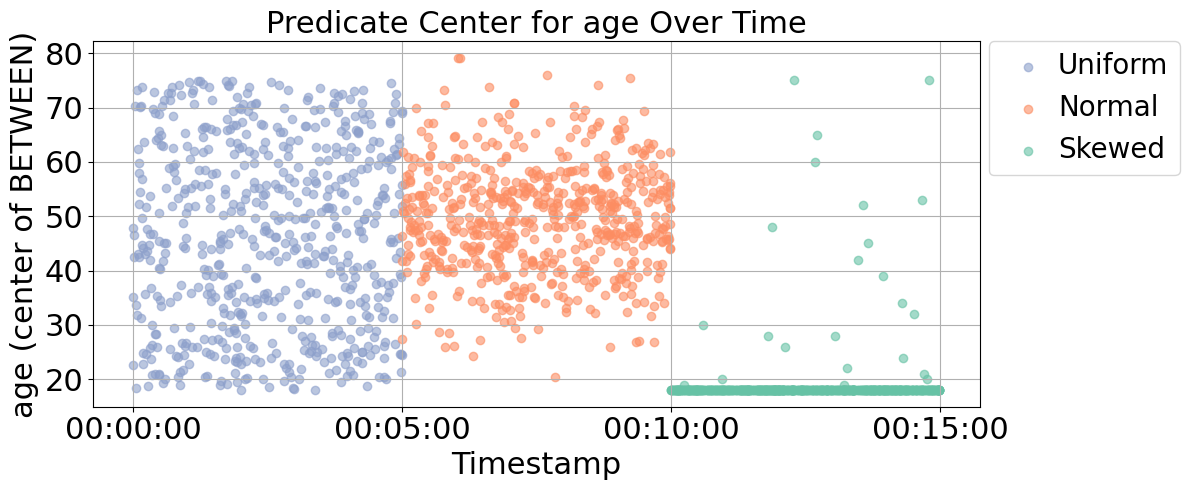

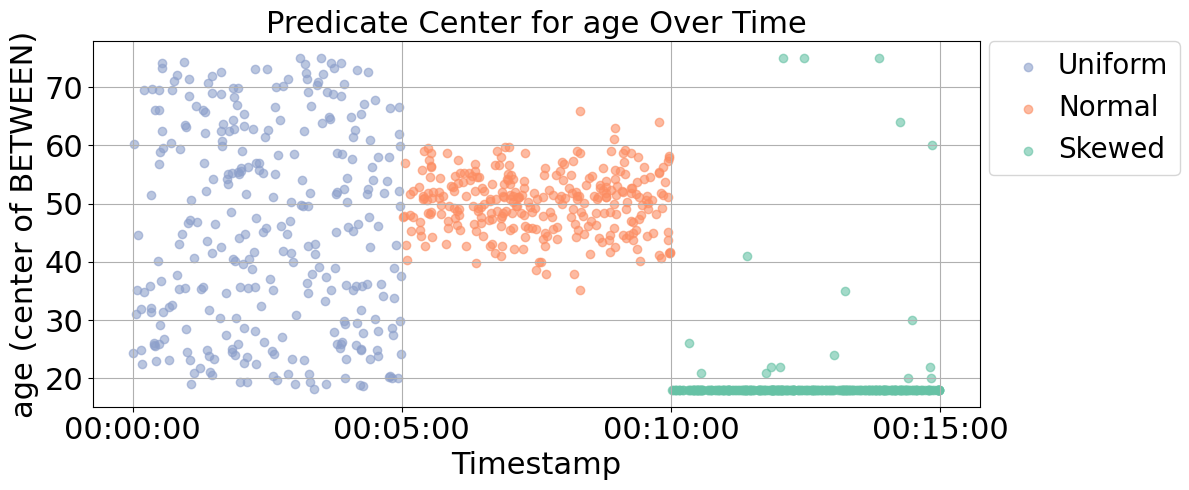

In [31]:
output_dir = "case_study"
os.makedirs(output_dir, exist_ok=True)


fontsize_title=22
fontsize_legend=20
fontsize_ticks=22
def plot_predicate_over_time_multi(csv_paths, column="age", labels=None, colors=None, file_name=""):
    plt.figure(figsize=(12, 5))

    for idx, csv_path in enumerate(csv_paths):
        df = pd.read_csv(csv_path)
        times, values = [], []
    
        for _, row in df.iterrows():
            ts = pd.to_datetime(row["timestamp"]).floor("s")
            # timestamps = pd.to_datetime(df["timestamp"]).dt.floor("s")
            sql = row["sql"]
    
            # 提取谓词值
            match = re.search(rf"{column} BETWEEN ([\d\.]+) AND ([\d\.]+)", sql)
            if match:
                v1 = float(match.group(1))
                v2 = float(match.group(2))
                center = (v1 + v2) / 2
                times.append(ts)
                values.append(center)

        # plt.plot(times, values, marker="o", linestyle="-", color=colors[idx], label=labels[idx], alpha=0.6)
        plt.scatter(times, values, marker="o",  color=colors[idx], label=labels[idx], alpha=0.6)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
    plt.title(f"Predicate Center for {column} Over Time", fontsize=fontsize_title)
    plt.xticks(fontsize=fontsize_ticks)
    plt.yticks(fontsize=fontsize_ticks)
    plt.xlabel("Timestamp", fontsize=fontsize_title)
    plt.ylabel(f"{column} (center of BETWEEN)", fontsize=fontsize_title)
    plt.grid(True)
    plt.legend(fontsize=fontsize_legend)
    plt.legend(fontsize=fontsize_legend, loc='upper left', bbox_to_anchor=(1.01, 1), handletextpad=0.1, borderaxespad=0.)
    plt.tight_layout()
    if is_fig_save and file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
    plt.show()

plot_predicate_over_time_multi(
    ["../data/generated_queries_age_uniform.csv", "../data/generated_queries_age_normal_50.csv", "../data/generated_queries_age_zipf_50.csv"],
    # ["../data/generated_queries_age_uniform.csv"],
    column="age",
    # labels=["QW", "Drift1", "Drift2"],
    labels=["Uniform", "Normal", "Skewed"],
    colors=['#8da0cb', '#fc8d62', '#66c2a5'],
    file_name="case_study_predicate_center"
)

plot_predicate_over_time_multi(
    ["../../output/workload/parametric/distribution/census_original_uniform_sqls.csv",
     "../../output/workload/parametric/distribution/census_original_normal_sqls.csv",
     "../../output/workload/parametric/distribution/census_original_skew_sqls.csv"],
    # ["../data/generated_queries_age_uniform.csv"],
    column="age",
    labels=["Uniform", "Normal", "Skewed"],
    colors=['#8da0cb', '#fc8d62', '#66c2a5'],
    file_name="case_study_predicate_center"
)
# colors=["blue", "orange", "green"],

In [9]:
# plot_predicate_over_time_multi(
#     ["../data/generated_queries_age_uniform.csv", "../data/generated_queries_age_uniform_periodic.csv",
#      "../data/generated_queries_age_uniform_random.csv", "../data/generated_queries_age_uniform_long_tail.csv"],
#     column="age",
#     labels=["uniform", "periodic", "random", "long_tail"],
#     colors=["blue", "green", "red"],
#     # file_name="case_study_frequency"
# )

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from collections import Counter
# import os


# def plot_query_frequency_over_time(csv_paths, labels=None, colors=None, file_name=""):
#     plt.figure(figsize=(12, 5))

#     for idx, csv_path in enumerate(csv_paths):
#         df = pd.read_csv(csv_path)
#         timestamps = pd.to_datetime(df["timestamp"])

#         second_bins = timestamps.dt.strftime("%H:%M:%S")
#         counter = Counter(second_bins)
#         times_sorted = sorted(counter.keys())
#         counts = [counter[t] for t in times_sorted]

#         label = labels[idx] if labels else f"Series {idx}"
#         color = colors[idx] if colors else None

#         # print(counts)
#         # print(times_sorted)

#         plt.plot(times_sorted, counts, marker="o", linestyle=None, alpha=0.7, label=label, color=color)

#     plt.title("Query Count per Second", fontsize=fontsize_title)
#     # plt.xticks(rotation=45, fontsize=fontsize_ticks)
#     plt.yticks(fontsize=fontsize_ticks)

#     plt.xticks([])
#     # plt.yticks([])
    
#     plt.xlabel("Time (HH:MM:SS)", fontsize=fontsize_title)
#     plt.ylabel("Query Count", fontsize=fontsize_title)
#     plt.grid(True)
#     plt.legend(fontsize=fontsize_legend)
#     plt.tight_layout()

#     plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
#     plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
#     plt.show()

# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd
# from collections import Counter
# import os

# def plot_query_frequency_over_time(csv_paths, labels=None, colors=None, file_name="query_freq"):
#     plt.figure(figsize=(12, 5))

#     for idx, csv_path in enumerate(csv_paths):
#         df = pd.read_csv(csv_path)
#         timestamps = pd.to_datetime(df["timestamp"])

#         # Round to nearest second (floor)
#         timestamps_rounded = timestamps.dt.floor("s")
#         counter = Counter(timestamps_rounded)
#         times_sorted = sorted(counter.keys())
#         counts = [counter[t] for t in times_sorted]

#         label = labels[idx] if labels else f"Series {idx}"
#         color = colors[idx] if colors else None

#         # Plot only markers (no line)
#         plt.plot(times_sorted, counts, marker="o", linestyle="None", alpha=0.7, label=label, color=color)

#     ax = plt.gca()
#     ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
#     ax.xaxis.set_major_locator(mdates.AutoDateLocator())

#     plt.title("Query Frequency Over Time", fontsize=16)
#     plt.xlabel("Timestamp", fontsize=14)
#     plt.ylabel("Query Count (per second)", fontsize=14)
#     plt.xticks(rotation=45, fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.grid(True)
#     plt.legend(fontsize=12)
#     plt.tight_layout()

#     # Save to file if directory variables exist
#     if file_name:
#         if "output_dir" in globals() and "overleaf_dir" in globals():
#             plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
#             plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')

#     plt.show()


# plot_query_frequency_over_time(
#     ["../data/generated_queries_age_uniform.csv", "../data/generated_queries_age_uniform_periodic.csv",
#      "../data/generated_queries_age_uniform_random.csv", "../data/generated_queries_age_uniform_long_tail.csv"],
#     labels=["uniform", "periodic", "random", "long_tail"],
#     colors=["blue", "green", "red", "orange"],
#     file_name="case_study_frequency"
# )

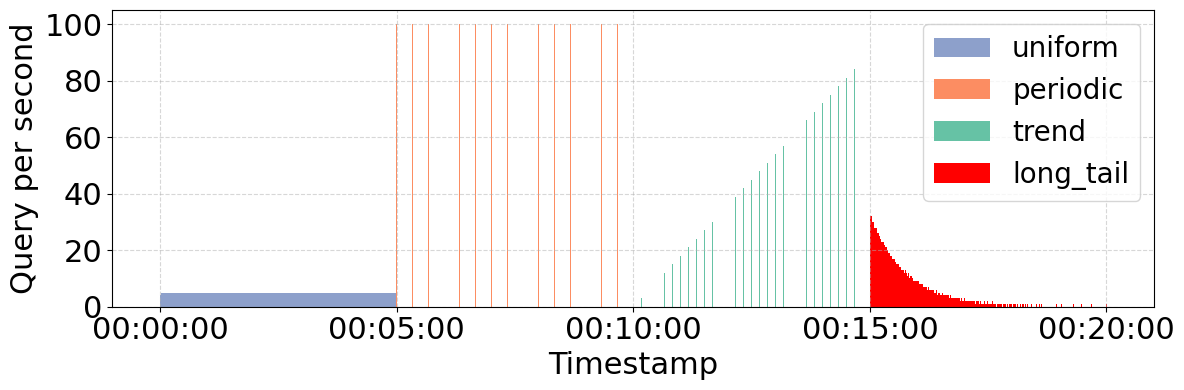

In [32]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter

fontsize_title=22
fontsize_legend=20
fontsize_ticks=22

def plot_query_frequency_histogram(csv_paths, labels=None, colors=None, file_name="query_histogram"):
    plt.figure(figsize=(12, 4))
    width = pd.Timedelta(seconds=1)  # 每根柱子的宽度

    for idx, csv_path in enumerate(csv_paths):
        df = pd.read_csv(csv_path)
        timestamps = pd.to_datetime(df["timestamp"]).dt.floor("s")  # 按秒计数
        counter = Counter(timestamps)

        times = sorted(counter.keys())
        counts = [counter[t] for t in times]
        color = colors[idx] if colors else None
        label = labels[idx] if labels else f"Series {idx}"

        # if idx == 1:
        #     print(times)
        #     print(counts)
        #     width = pd.Timedelta(seconds=2)
        # else:
        #     width = pd.Timedelta(seconds=1)
        
        plt.bar(times, counts, width=width, align="center", color=color, alpha=1.0, label=label)

    # 时间轴美化
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
    plt.xticks(fontsize=fontsize_ticks)
    plt.yticks(fontsize=fontsize_ticks)
    # plt.xticks([])
    plt.xlabel("Timestamp", fontsize=fontsize_title)
    plt.ylabel("Query per second", fontsize=fontsize_title)
    # plt.title("Query Frequency Over Time", fontsize=fontsize_title)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(fontsize=fontsize_legend)
    plt.tight_layout()

    if is_fig_save and file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')

    plt.show()

plot_query_frequency_histogram(
    ["../data/generated_queries_age_uniform.csv", "../data/generated_queries_age_uniform_periodic.csv",
     "../data/generated_queries_age_uniform_trend.csv", "../data/generated_queries_age_uniform_long_tail.csv"],
    labels=["uniform", "periodic", "trend", "long_tail"],
    colors=['#8da0cb', '#fc8d62', '#66c2a5', "red"],
    file_name="case_study_frequency"
)
    
# plot_query_frequency_histogram(
#     ["../data/generated_queries_age_uniform.csv", "../data/generated_queries_age_uniform_periodic.csv",
#      "../data/generated_queries_age_uniform_trend.csv", "../data/generated_queries_age_uniform_long_tail.csv"],
#     labels=["uniform", "periodic", "trend", "long_tail"],
#     colors=["blue", "orange", "green", "red"],
#     file_name="case_study_frequency"
# )

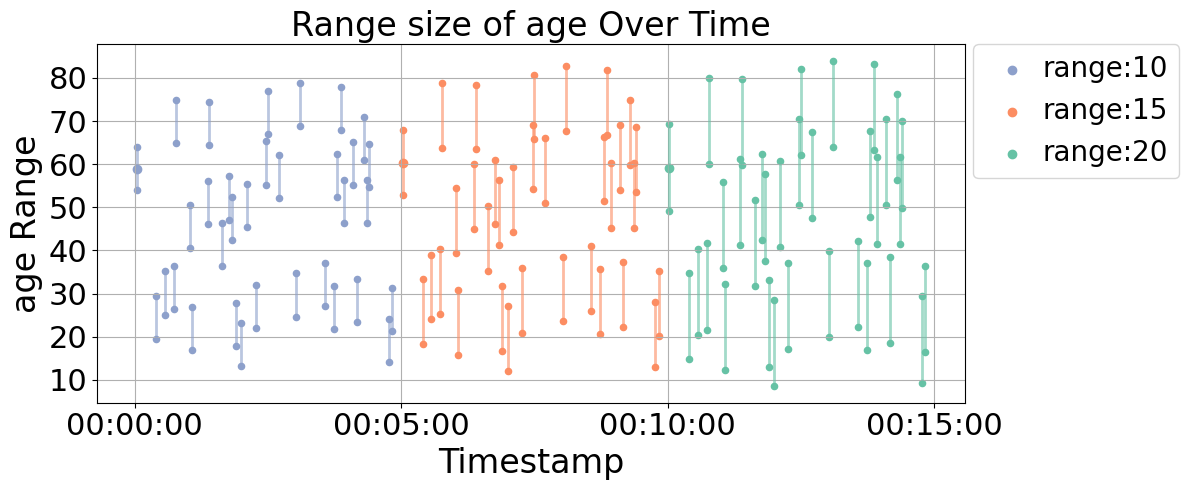

In [33]:
def plot_predicate_over_time_multi(csv_paths, column="age", labels=None, colors=None, file_name=""):
    plt.figure(figsize=(12, 5))

    for idx, csv_path in enumerate(csv_paths):
        df = pd.read_csv(csv_path)
        times, values = [], []
    
        for j, row in df.iterrows():
            
            if j % 10 != 0:
                continue 

                
            ts = pd.to_datetime(row["timestamp"]).floor("s")
            # timestamps = pd.to_datetime(df["timestamp"]).dt.floor("s")
            sql = row["sql"]
    
            match = re.search(rf"{column} BETWEEN ([\d\.]+) AND ([\d\.]+)", sql)
            # if match:
            #     # print(sql)
            #     v1 = float(match.group(1))
            #     v2 = float(match.group(2))
            #     range_size = (v2 - v1)
            #     times.append(ts)
            #     values.append(range_size)
            #     # print(v1, v2, range_size)

            if match:
                v1 = float(match.group(1))
                v2 = float(match.group(2))

                color = colors[idx] if colors else None
                label = labels[idx] if j == 0 and labels else None

                # 垂直线段
                v2 = v1 + (idx + 2) * 5
                plt.vlines(x=ts, ymin=v1, ymax=v2, color=color, linewidth=2, alpha=0.6, label=label)
                # 端点
                times.append(ts)
                values.append((v1 + v2) / 2)
                plt.scatter([ts, ts], [v1, v2], color=color, s=20, alpha=1.0)

        # plt.plot(times, values, marker="o", linestyle="-", label=labels[idx], alpha=0.7)
        # plt.scatter(times, values, marker="o", label=labels[idx], alpha=0.7)
        if times:
            plt.scatter(times[:1], values[:1], color=color, marker="o", label=labels[idx], alpha=1.0)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
    plt.title(f"Range size of {column} Over Time", fontsize=fontsize_title + 2)
    plt.xticks(fontsize=fontsize_ticks)
    plt.yticks(fontsize=fontsize_ticks)
    plt.xlabel("Timestamp", fontsize=fontsize_title + 2)
    # plt.ylabel(f"Range size of {column}", fontsize=fontsize_title + 2)
    plt.ylabel(f"{column} Range", fontsize=fontsize_title + 2)
    plt.grid(True)
    plt.legend(fontsize=fontsize_legend)
    plt.legend(fontsize=fontsize_legend, loc='upper left', bbox_to_anchor=(1.01, 1), handletextpad=0.1, borderaxespad=0.)
    plt.tight_layout()
    if is_fig_save and file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
    plt.show()

# plot_predicate_over_time_multi(
#     ["../data/generated_queries_age_uniform.csv", "../data/generated_queries_age_uniform_selectivity_2.csv", 
#      "../data/generated_queries_age_uniform_selectivity_3.csv"],
#     # ["../data/generated_queries_age_uniform.csv"],
#     column="age",
#     labels=["QW", "Drift1", "Drift2", "ratio-0.4"],
#     colors=['#8da0cb', '#fc8d62', '#66c2a5', "red"],
#     file_name="case_study_predicate_range_size"
# )


plot_predicate_over_time_multi(
    ["../../output/workload/parametric/selectivity/census_original_sqls_selectivity_1.csv",
     "../../output/workload/parametric/selectivity/census_original_sqls_selectivity_2.csv",
     "../../output/workload/parametric/selectivity/census_original_sqls_selectivity_3.csv"],
    # ["../data/generated_queries_age_uniform.csv"],
    column="age",
    # labels=["QW", "Drift1", "Drift2"],
    labels=["range:10", "range:15", "range:20"],
    colors=['#8da0cb', '#fc8d62', '#66c2a5'],
    file_name="case_study_predicate_range_size"
)

/Users/guanlil1/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


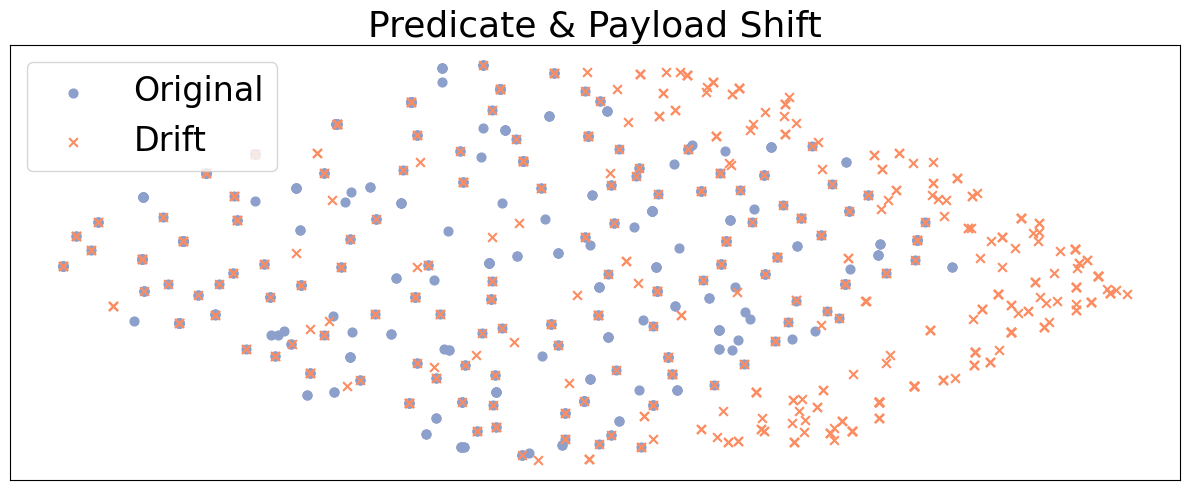

/Users/guanlil1/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


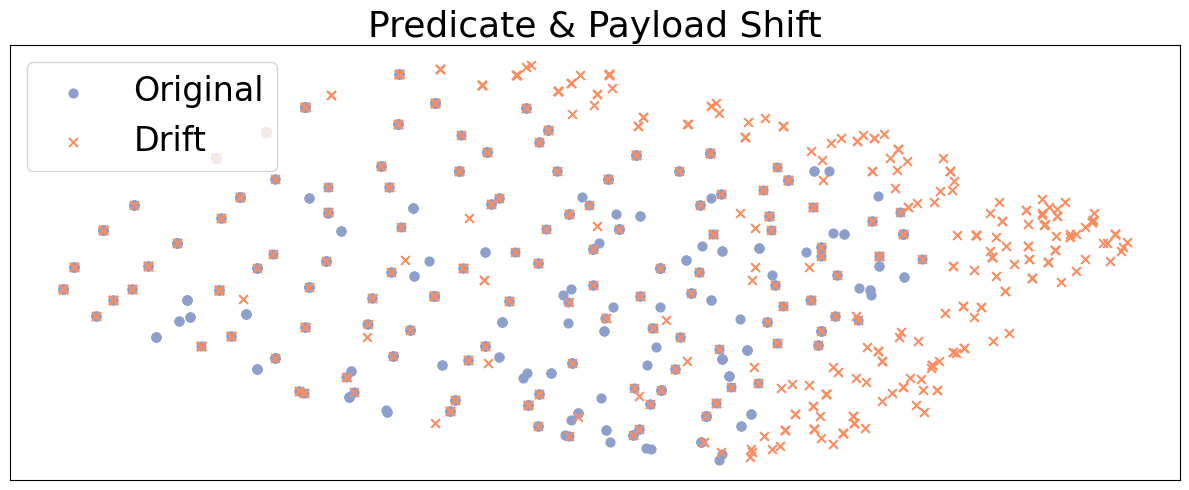

In [37]:

type_arr = ["numeric", "string", "datetime", "categorical"]
def sql_to_feature_vector(template):
    num_predicates = len(template.get("predicate", []))
    num_payload = len(template.get("payload", {}).get("columns", []))
    # has_agg = int(template.get("payload", {}).get("aggregation") is not None)
    # has_order_by = int(template.get("payload", {}).get("order_by") is not None)
    result = [num_predicates, num_payload]
    
    predicate_type_vector = [0] * 4
    type_arr = ["numeric", "string", "datetime", "categorical"]

    # print(template['predicate'])
    for predicate in template['predicate']:
        type_index = type_arr.index(predicate['type'])
        predicate_type_vector[type_index] += 1
        
    result.extend(predicate_type_vector)
    
    return result

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

def plot_tsne(embedding, labels, title, save_name):
    embedding = np.array(embedding)
    tsne = TSNE(n_components=2, perplexity=50, n_iter=300, init="pca", learning_rate="auto", random_state=42)
    embedding_2d = tsne.fit_transform(embedding)

    stage_marker_map = {"Original": "o", "Drift": "x", "t2": "D"}
    stage_color_map = {"Original": "#8da0cb", "Drift": "#fc8d62", "t2": "D"}

    plt.figure(figsize=(12, 5))
    for stage in set(labels):
        idx = [i for i, l in enumerate(labels) if l == stage]
        marker = stage_marker_map.get(stage, "o")
        color = stage_color_map.get(stage, "red")
        plt.scatter(embedding_2d[idx, 0], embedding_2d[idx, 1],
                    label=stage, s=40, color=color, alpha=1.0, marker=marker)

    plt.legend(fontsize=24, loc='upper left')
    plt.title(title, fontsize=26)
    plt.xticks([]); plt.yticks([])
    plt.tight_layout()
    if is_fig_save and save_name:
        plt.savefig(os.path.join(output_dir, save_name + ".png"), format="png", bbox_inches="tight")
        plt.savefig(os.path.join(overleaf_dir, save_name + ".pdf"), format='pdf', bbox_inches='tight')
    plt.show()
    plt.close()

def get_vector(template_files = ["../data/sample_templates.json"]):    
    vectors = []
    labels = []
    label_list = ["Original", "Drift"]
    for i, template_file in enumerate(template_files):
        with open(template_file) as f:
            templates = json.load(f)
            for t in templates:
                vectors.append(sql_to_feature_vector(t))
                labels.append(label_list[i])

    return vectors, labels

vectors, labels= get_vector(["../data/sample_templates_predicates_2.json", "../data/sample_templates_predicates_3.json"])

plot_tsne(vectors, labels, title="Predicate & Payload Shift", save_name="tsne_pred_payload")

vectors, labels = get_vector(["../../output/intermediate/census_original_templates_structual_2.json", 
                              "../../output/intermediate/census_original_templates_structual_3.json"])
plot_tsne(vectors, labels, title="Predicate & Payload Shift", save_name="tsne_pred_payload")